In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the datasets
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('ntest1.csv')

# Check for missing values and drop them
train_df = train_df.dropna()
test_df = test_df.dropna()

In [4]:
# Merge 'title' and 'text' columns into a single column 'news'
train_df['news'] = train_df['title'] + ' ' + train_df['text']
test_df['news'] = test_df['title'] + ' ' + test_df['text']

# Retain only the necessary columns
train_df = train_df[['news', 'label']]
test_df = test_df[['news', 'label']]

In [5]:

# Prepare the data
X = train_df['news']
Y = train_df['label']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=42)

In [6]:
# Initialize and fit the vectorizer (TfidfVectorizer or CountVectorizer)
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
vectorizer.fit(x_train)


TfidfVectorizer(max_features=5000, stop_words='english')

In [7]:
# Transform the text data
x_train_vectorized = vectorizer.transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [8]:
# Initialize models
nb_model = MultinomialNB()
lr_model = LogisticRegression(max_iter=1000, C=10)


In [9]:

# Hyperparameter tuning for Logistic Regression using GridSearchCV
param_grid = {'C': [1, 10, 100, 1000]}
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=1000), param_grid, cv=5, scoring='accuracy')
grid_search_lr.fit(x_train_vectorized, y_train)
best_lr_model = grid_search_lr.best_estimator_

In [10]:

# Train models
nb_model.fit(x_train_vectorized, y_train)
best_lr_model.fit(x_train_vectorized, y_train)


LogisticRegression(C=10, max_iter=1000)

In [11]:

# Evaluate models
nb_accuracy = accuracy_score(y_test, nb_model.predict(x_test_vectorized))
lr_accuracy = accuracy_score(y_test, best_lr_model.predict(x_test_vectorized))

print(f"Naive Bayes Test Accuracy: {nb_accuracy:.2f}")
print(f"Logistic Regression Test Accuracy: {lr_accuracy:.2f}")

Naive Bayes Test Accuracy: 0.89
Logistic Regression Test Accuracy: 0.96


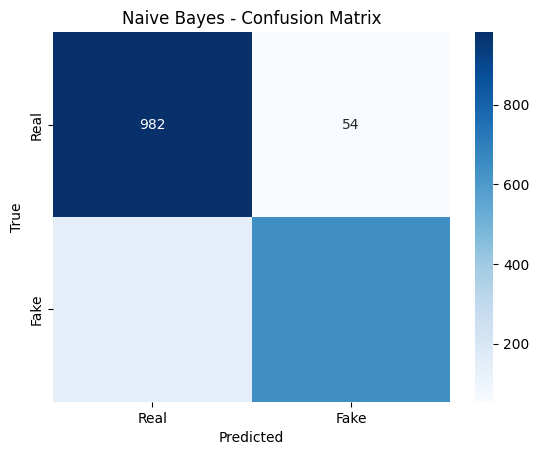

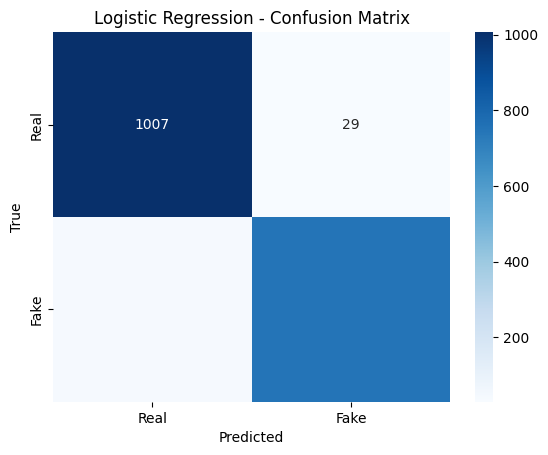

In [12]:
# Confusion matrix for both models
nb_cm = confusion_matrix(y_test, nb_model.predict(x_test_vectorized))
lr_cm = confusion_matrix(y_test, best_lr_model.predict(x_test_vectorized))

# Plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['Real', 'Fake'], yticklabels=['Real', 'Fake'])
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

plot_confusion_matrix(nb_cm, "Naive Bayes")
plot_confusion_matrix(lr_cm, "Logistic Regression")

In [13]:

# Classification report for both models
print("\nNaive Bayes Classification Report:")
print(classification_report(y_test, nb_model.predict(x_test_vectorized)))

print("\nLogistic Regression Classification Report:")
print(classification_report(y_test, best_lr_model.predict(x_test_vectorized)))


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91      1036
           1       0.92      0.81      0.86       793

    accuracy                           0.89      1829
   macro avg       0.89      0.88      0.88      1829
weighted avg       0.89      0.89      0.89      1829


Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1036
           1       0.96      0.94      0.95       793

    accuracy                           0.96      1829
   macro avg       0.96      0.96      0.96      1829
weighted avg       0.96      0.96      0.96      1829



In [14]:
# Input the news
news = input("\nEnter the news text: ")

# Preprocess and vectorize the input
news_vectorized = vectorizer.transform([news])

# Predict probabilities using both models
nb_probabilities = nb_model.predict_proba(news_vectorized)[0]
lr_probabilities = best_lr_model.predict_proba(news_vectorized)[0]

# Naive Bayes Prediction
nb_prediction = "Fake" if nb_probabilities[1] > nb_probabilities[0] else "Real"
nb_confidence = max(nb_probabilities) * 100

# Logistic Regression Prediction
lr_prediction = "Fake" if lr_probabilities[1] > lr_probabilities[0] else "Real"
lr_confidence = max(lr_probabilities) * 100

# Compare the models and select the one with higher confidence
if nb_confidence > lr_confidence:
    selected_model = "Naive Bayes"
    selected_prediction = nb_prediction
    selected_confidence = nb_confidence
else:
    selected_model = "Logistic Regression"
    selected_prediction = lr_prediction
    selected_confidence = lr_confidence

# Display the results
print(f"\nNaive Bayes Prediction: {nb_prediction} with Confidence: {nb_confidence:.2f}%")
print(f"Logistic Regression Prediction: {lr_prediction} with Confidence: {lr_confidence:.2f}%")
print(f"\nFinal Prediction: {selected_prediction} (Confidence: {selected_confidence:.2f}%, Model: {selected_model})")


Enter the news text:   SC finds things ‘amiss’ in the Kolkata rape-murder case What The Supreme Court on Monday voiced concern over the absence of a key document that was needed for the postmortem of the medic raped and murdered at the RG Kar Medical College in Calcutta. It has asked the CBI to investigate it. The top court also directed the protesting resident doctors in West Bengal to resume work by 5 pm on Tuesday and said no adverse action shall be taken against them on resumption of work. It also wants the immediate removal of photographs of the victim from all social media platforms to protect the dignity and privacy of the deceased. Missing doc A bench headed by Chief Justice DY Chandrachud said there was no reference of the ‘challan’ (document) used, and sought an answer from the CBI and the West Bengal government. “Where is the challan of the body when it was handed over for postmortem?” the bench, also comprising Justices JB Pardiwala and Manoj Misra, asked. Solicitor Genera


Naive Bayes Prediction: Real with Confidence: 70.95%
Logistic Regression Prediction: Real with Confidence: 74.01%

Final Prediction: Real (Confidence: 74.01%, Model: Logistic Regression)
